# Classify Polyps for Colon Cancer

## Load Image Dataset with OpenCV

In [13]:
import os
import csv
import cv2
import sys
import itertools
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [4]:
%matplotlib inline

## Pipeline Algorithm

In [22]:
def get_filepaths(basepath, file_type):
    files = []
    for filename in os.listdir(basepath):
        if filename.endswith(file_type):
            filepath = os.path.join(basepath, filename)
            files.append(filepath)
    return files

def read_img(img_path):
    image = mpimg.imread(img_path)
    print("This image is:", type(image), "with dimensions:", image.shape)
    return image

def get_images(img_files):
    images = []
    for img_file in img_files:
        image = read_img(img_file)
        images.append(image)
        return images

def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def gaussian_blur(img, kernel_size):
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)


# loads image from filepath using opencv
def get_image(basepath, filepath):
    # read images
    source_path = filepath
    # extract filename from filepath using split and check platform
    if sys.platform == 'win32':
        filename = source_path.split("\\")[-1]
    elif sys.platform == 'linux' or sys.platform == 'darwin':
        filename = source_path.split("/")[-1]
    # add filename to end of path to PolypSet dir, so platform isn't an issue
    img_path_on_fs = basepath + filename
    # load image using opencv
    image = cv2.imread(img_path_on_fs)
    return image

In [ ]:
# Extract image along with its associated boundbox
images = []
bounding_boxes = []

## Load Training, Valid & Testing Set

### Get Image Training Filepaths

In [20]:
train_basepath = "PolypsSet/train2019/Image"
file_type = ".jpg"
train_filepaths = get_filepaths(train_basepath, file_type)
        
print(len(train_filepaths))
print(train_filepaths[0])

28773
PolypsSet/train2019/Image/11548.jpg


This image is: <class 'numpy.ndarray'> with dimensions: (288, 384, 3)


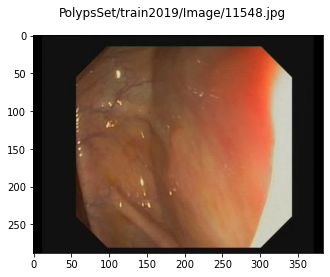

In [25]:
train_images = get_images(train_filepaths)

plt.suptitle(train_filepaths[0])
plt.imshow(train_images[0])

In [ ]:
# up_to = 5
# for filepath in itertools.islice(train_filepaths, up_to):
#     print(filepath)